<a href="https://colab.research.google.com/github/DaanMoura/AprendizadoDeMaquina/blob/main/trabalho2/AM_Trab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import secrets
from prettytable import PrettyTable

In [66]:
numbers_df = pd.read_csv("https://media.githubusercontent.com/media/DaanMoura/AprendizadoDeMaquina/main/trabalho2/data/numbers.csv")

In [67]:
numbers_df.tail(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
69990,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69992,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69993,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69994,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69999,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [68]:
numbers_df.drop(['label'], axis=1, inplace=True)

In [69]:
numbers_df['pixel783'] = 0
numbers = numbers_df.to_numpy()
len(numbers)

70000

In [70]:
def to_binary(image):
  out = image.copy()
  for i in range(len(image)):
    if (image[i] > 0):
        out[i] = 255
    else:
        out[i] = 0
  return out
      

In [71]:
bin_numbers = numbers.copy()
for i in range(len(numbers)):
  if i % 10000 == 0:
    print('passando por ', i)
  bin_numbers[i] = to_binary(numbers[i])

passando por  0
passando por  10000
passando por  20000
passando por  30000
passando por  40000
passando por  50000
passando por  60000


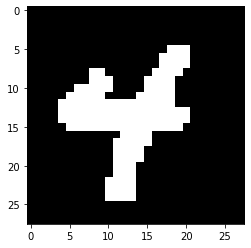

In [72]:
plt.imshow(bin_numbers[2310].reshape(28,28), cmap = 'gray')

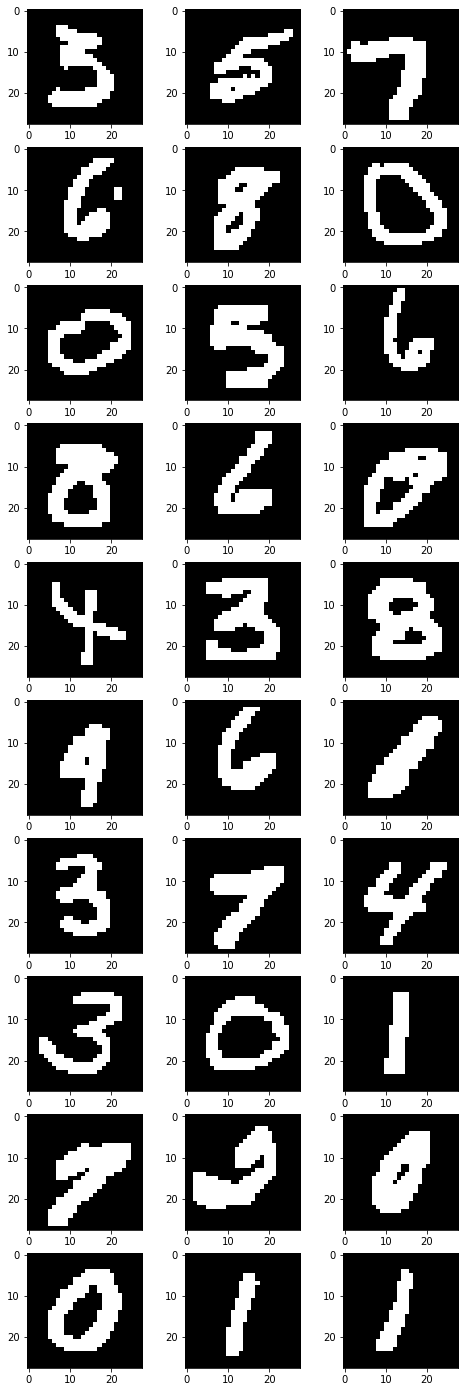

In [73]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(bin_numbers[secrets.choice(list(range(70000)))].reshape(28,28), cmap = 'gray')

In [74]:
reduced_data = PCA(n_components=2).fit_transform(numbers)
print(reduced_data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(reduced_data)

[[ 7.67621588e+02 -4.03168166e+01]
 [ 1.13605229e+03 -6.51347512e-01]
 [-4.98306895e+02  1.09635497e+01]
 ...
 [ 4.67063338e+02  8.97783099e+02]
 [ 2.91861039e+02 -1.66625929e-01]
 [-3.21555644e+02  4.49499615e+02]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [75]:
kmeans.n_clusters

10

In [76]:
kmeans.cluster_centers_

array([[ 2.37249455e+01, -6.38702236e+02],
       [ 1.49339070e+02,  1.18518392e+00],
       [-1.99356661e+02,  6.55180737e+02],
       [ 1.35159150e+03, -2.01807648e+02],
       [-4.96052287e+02,  2.64778328e+02],
       [ 7.05035841e+02,  5.94772581e+01],
       [-2.84821681e+02, -2.39490689e+02],
       [-8.12908665e+02, -4.15243088e+02],
       [ 2.89749541e+02,  7.95290997e+02],
       [ 5.84341629e+02, -5.00363879e+02]])

In [77]:
x = []
y = []
for i in kmeans.cluster_centers_:
  x.append(i[0])
  y.append(i[1])


In [87]:
k = {}
z = {}
for i in range (0, 10):
  k[i] = []
  z[i] = []
for i in range(0, 70000):
  k[kmeans.labels_[i]].append(reduced_data[i][0])
  z[kmeans.labels_[i]].append(reduced_data[i][1])


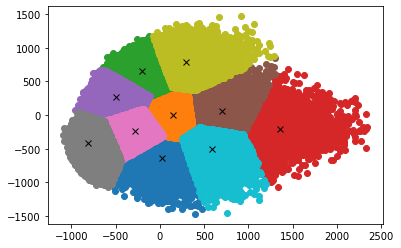

In [94]:

for i in range (0,10):
  plt.plot(k[i],z[i],'o')
plt.plot(x,y,'x', color = 'black') 

In [84]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(bin_numbers[secrets.choice(list(range(70000)))].reshape(28,28), cmap = 'gray')

70000

In [ ]:
reduced_data

In [ ]:
reduced_data[0]